<a href="https://colab.research.google.com/github/k-shaik/k-shaik/blob/main/AI_ML_driven_analysis_of_cyber_threats_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install pandas


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


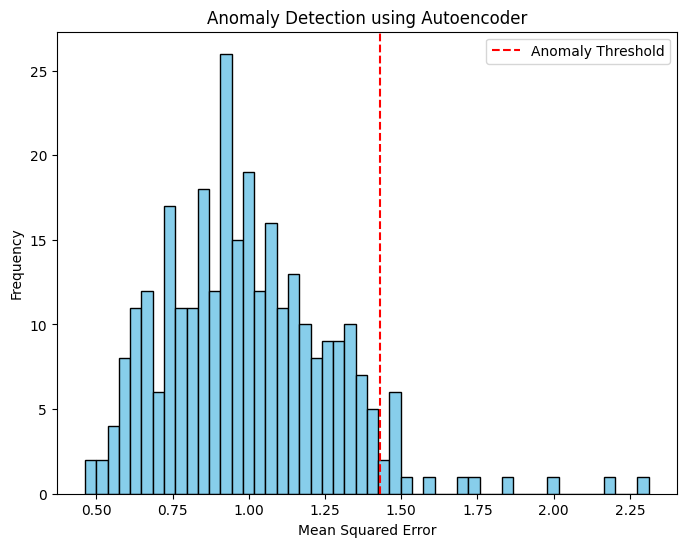

<ipython-input-13-dcc1492b1deb>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


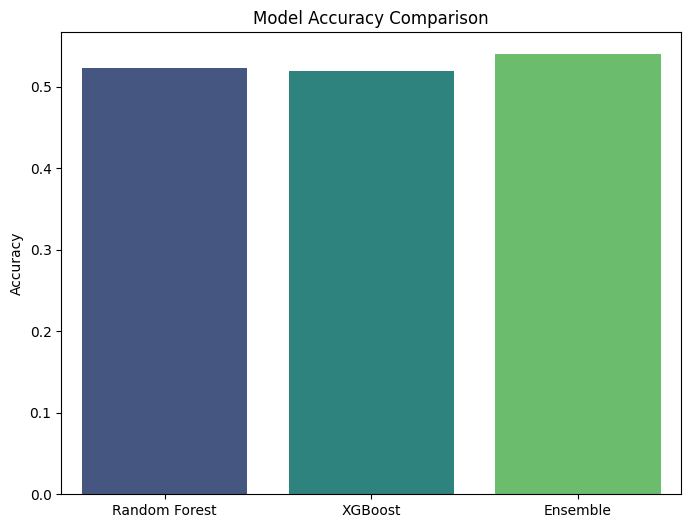

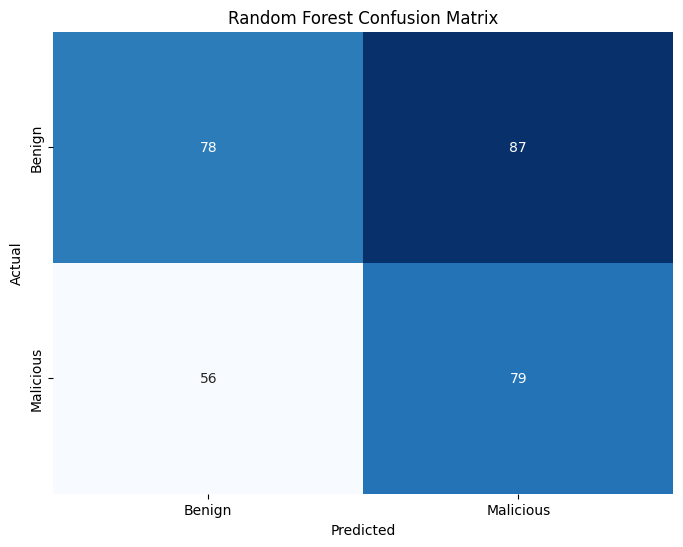

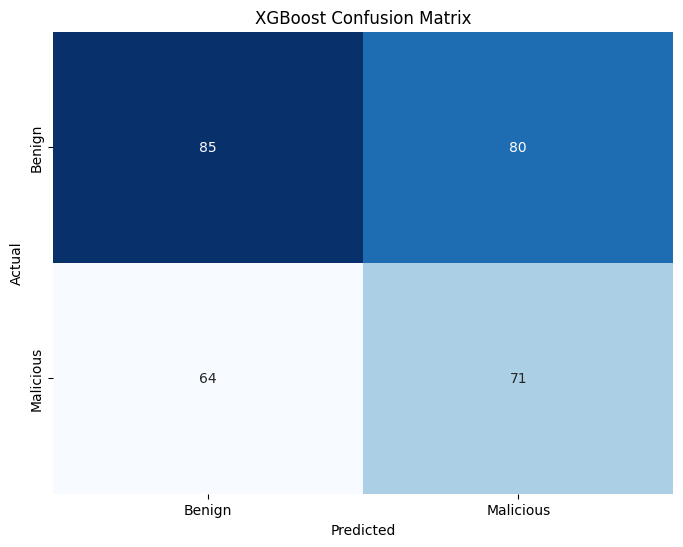

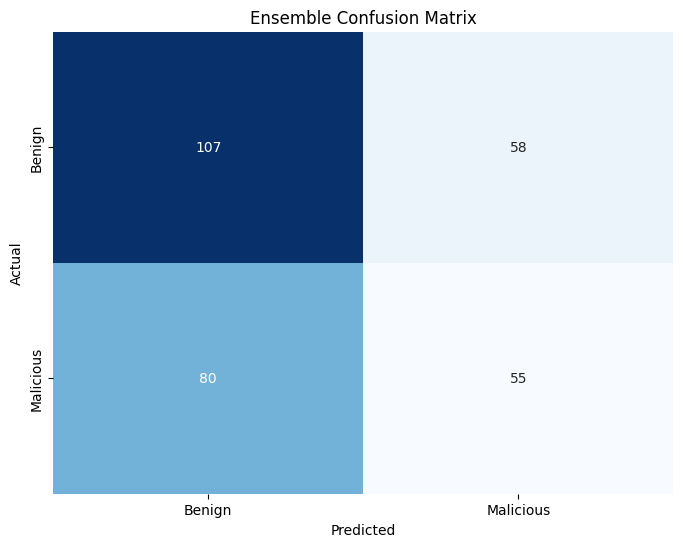

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Load NSL-KDD dataset
# Replace with the actual file path if needed
df = pd.read_csv('/content/NSL_KDD_Train.csv')

# For demonstration purposes, let's simulate some data
df = pd.DataFrame(np.random.randn(1000, 30))  # Random data for testing
df['label'] = np.random.randint(0, 2, 1000)  # Binary labels

# Data Preprocessing
def preprocess_data(df):
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Labels (Benign or Malicious)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Autoencoder for anomaly detection
def build_autoencoder(X_train):
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l2(0.001))(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)
    return autoencoder

# Anomaly Detection using Autoencoder
def detect_anomalies(autoencoder, X_test):
    reconstructed = autoencoder.predict(X_test)
    mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
    return mse

# Random Forest Classifier
def random_forest_classifier(X_train, y_train, X_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return y_pred

# XGBoost Classifier
def xgboost_classifier(X_train, y_train, X_test):
    model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Visualization functions
def plot_anomaly_detection(mse, threshold):
    plt.figure(figsize=(8, 6))
    plt.hist(mse, bins=50, color='skyblue', edgecolor='black')
    plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
    plt.title('Anomaly Detection using Autoencoder')
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_accuracy_comparison(rf_accuracy, xgb_accuracy, ensemble_accuracy):
    plt.figure(figsize=(8, 6))
    models = ['Random Forest', 'XGBoost', 'Ensemble']
    accuracies = [rf_accuracy, xgb_accuracy, ensemble_accuracy]
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Main Program
def main():
    X, y = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Autoencoder for Anomaly Detection
    autoencoder = build_autoencoder(X_train)
    mse = detect_anomalies(autoencoder, X_test)
    anomaly_threshold = np.percentile(mse, 95)  # Top 5% as anomalies
    plot_anomaly_detection(mse, anomaly_threshold)

    # Random Forest and XGBoost Classifiers
    rf_predictions = random_forest_classifier(X_train, y_train, X_test)
    xgb_predictions = xgboost_classifier(X_train, y_train, X_test)

    # Model Performance
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)

    # Ensemble Model (Majority Voting)
    final_predictions = np.array([rf_predictions, xgb_predictions]).T
    final_predictions = [np.bincount(predictions).argmax() for predictions in final_predictions]
    ensemble_accuracy = accuracy_score(y_test, final_predictions)

    # Plot Accuracy Comparison
    plot_accuracy_comparison(rf_accuracy, xgb_accuracy, ensemble_accuracy)

    # Confusion Matrices
    plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')
    plot_confusion_matrix(y_test, xgb_predictions, title='XGBoost Confusion Matrix')
    plot_confusion_matrix(y_test, final_predictions, title='Ensemble Confusion Matrix')

if __name__ == "__main__":
    main()
